In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pickle
import copy
import datetime
import torch
import gym
import custom_gym
import random
from config import cfg_seed, cfg_env, cfg_z_dim, cfg_default_lr, cfg_default_early
seed = cfg_seed
env_str=cfg_env
default_lr=cfg_default_lr
default_early=cfg_default_early

if cfg_env == "pendulum":
    env_name = "CustomPendulum-v0"
if cfg_env == "cartpole":
    env_name = "CustomCartPole-v0"

figfilenamehead = "fig_policy_evaluation_"+cfg_env+"_"

num_iter_max=200000
print("seed",seed)
print(datetime.datetime.now())

seed 4
2023-07-08 12:09:02.411786


In [2]:
env = gym.make(env_name)


random.seed(seed)
np.random.seed(seed)
env.seed(seed)
env.action_space.seed(seed)
torch.manual_seed(seed)

s_dim = env.reset().flatten().shape[0]
a_dim = env.action_space.sample().flatten().shape[0]
z_dim = cfg_z_dim
print(s_dim, a_dim, z_dim)


2 1 1


/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/wrappers/step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:174: UserWarning: WARN: Future gym versions will require that `Env.reset` can be passed a `seed` instead of using `Env.seed` for resetting the environment random number generator.
  logger.warn(
/home/proxima-hishinuma/anaconda3/

In [3]:
from sac import SAC
agent = SAC(env.observation_space.shape[0], env.action_space)
agent.load_checkpoint(ckpt_path="checkpoints/sac_checkpoint_custom_"+env_str+"_mdp_", evaluate=True)

Loading models from checkpoints/sac_checkpoint_custom_pendulum_mdp_


In [4]:
# # # # データ生成
from get_offline_data import getOfflineData
getOfflineData(env_name=env_name, episode_num=100, seed=seed)

/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:227: DeprecationWarning: WARN: Core environment is written in old step API which returns one bool instead of two. It is recommended to rewrite the environment with new step API. 
  logger.deprecation(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:233: DeprecationWarning: `np.bool8` is a deprecated alias for `np.bool_`.  (Deprecated NumPy 1.24)
  if not isinstance(done, (bool, np.bool8)):
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:141: UserWarning: WARN: The obs returned by the `step()` method was expecting numpy array dtype to be float32, actual type: float64
  logger.warn(
/home/proxima-hishinuma/anaconda3/envs/iwvi/lib/python3.8/site-packages/gym/utils/passive_env_checker.py:165: UserWarning: WARN: The obs returned by the `step()` method is not within the observ

In [5]:
offline_data = pickle.load(open("offline_data_"+env_str+".pkl","rb"))

debug_info = pickle.load(open("offline_data_debug_info_"+env_str+".pkl","rb"))
debug_info = np.array(debug_info)
print("offline_data[1].sum()", offline_data[1].sum())
print(debug_info.shape)


offline_data[1].sum() tensor(1076.2506)
(100, 2)


In [6]:
import vi_base

args_init_dict = {
    "offline_data": offline_data,
    "s_dim": s_dim,
    "a_dim": a_dim,
    "z_dim": z_dim,
    #              "policy":agent.select_action,
    "mdp_policy":agent.policy.my_np_select_action,
    "bamdp_policy":None,
    "debug_info":debug_info,
    "env" : env,
    "ckpt_suffix" : env_str,
}

vi = vi_base.baseVI(args_init_dict)

dec: h_dim 48


In [7]:
vi.get_real_rollout_mdppolicy_data()

0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97  98  99   


tensor(3.9510)tensor(5.2491)tensor(6.4720)tensor(4.7827)tensor(5.1690)tensor(3.0717)tensor(3.8374)tensor(5.5620)tensor(4.2903)tensor(3.8383)tensor(4.4280)tensor(7.5468)tensor(10.2497)tensor(5.8425)tensor(2.2750)tensor(7.2645)tensor(5.4596)tensor(5.6220)tensor(4.0357)tensor(3.8131)tensor(4.6688)tensor(5.4960)tensor(4.3721)tensor(4.9137)tensor(5.3968)tensor(8.0189)tensor(4.6860)tensor(3.6362)tensor(6.0469)tensor(5.0646)tensor(4.8371)tensor(3.6339)tensor(7.3950)tensor(6.9031)tensor(5.3300)tensor(6.2132)tensor(4.7158)tensor(5.7274)tensor(6.4614)tensor(7.6295)tensor(6.4474)tensor(4.6100)tensor(3.7994)tensor(2.6706)tensor(7.2297)tensor(5.8879)tensor(5.2783)tensor(6.7364)tensor(3.6051)tensor(4.9724)tensor(5.1111)tensor(4.6015)tensor(3.2734)tensor(3.0836)tensor(13.2465)tensor(9.5399)tensor(3.2886)tensor(4.0271)tensor(4.8492)tensor(3.9979)tensor(3.5443)tensor(7.4787)tensor(3.2999)tensor(4.3905)tensor(3.8344)tensor(4.6973)tensor(3.7855)tensor(5.8381)tensor(7.5193)tensor(6.5369)tensor(4.9257)tens

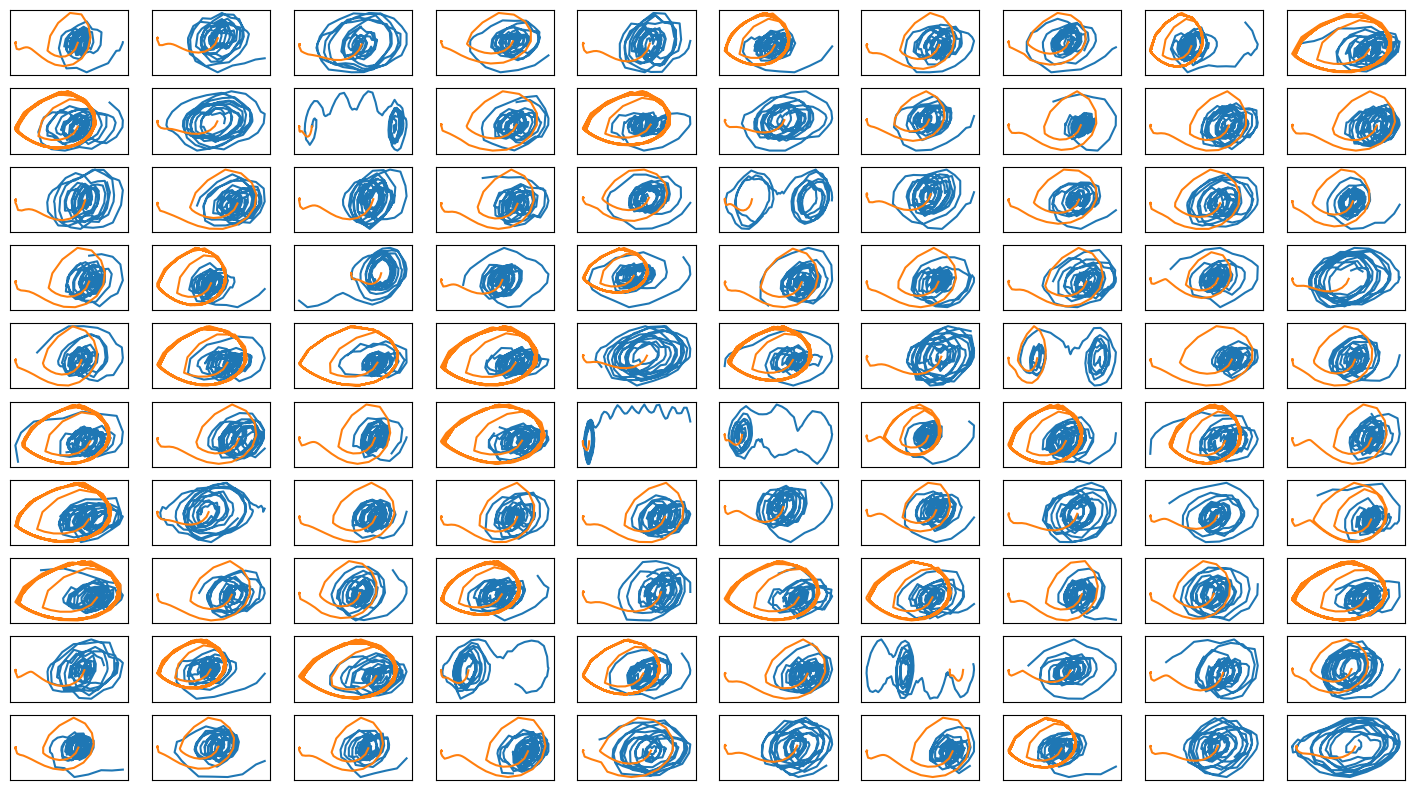

In [8]:
fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)))
ax_list = []
for i in range(len(offline_data)):
    print(vi.offline_data[i][:,1].max(), end="")
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(vi.offline_data[i][:,0], vi.offline_data[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1]) 
print("オフラインデータvs実環境方策rollout")
plt.show()

In [9]:
train_curve1, valid_curve1 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=1)
vi.update_mulogvar_offlinedata()

# train_curve2, valid_curve2 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=2)
# vi.update_mulogvar_offlinedata()

# train_curve3, valid_curve3 = vi.train_unweighted_vae(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early, flag=3)
# vi.update_mulogvar_offlinedata()



train_vae: enc_dec
train: iter 0  trainloss 4412.05831  validloss 769.34602±0.00000  bestvalidloss 769.34602  last_update 0
train: iter 1  trainloss 1085.16850  validloss 613.85013±0.00000  bestvalidloss 613.85013  last_update 0
train: iter 2  trainloss 619.15075  validloss 494.32641±0.00000  bestvalidloss 494.32641  last_update 0
train: iter 3  trainloss 516.05968  validloss 460.42095±0.00000  bestvalidloss 460.42095  last_update 0
train: iter 4  trainloss 495.45730  validloss 430.29868±0.00000  bestvalidloss 430.29868  last_update 0
train: iter 5  trainloss 421.97972  validloss 399.39937±0.00000  bestvalidloss 399.39937  last_update 0
train: iter 6  trainloss 337.89424  validloss 366.06959±0.00000  bestvalidloss 366.06959  last_update 0
train: iter 7  trainloss 223.10232  validloss 315.17094±0.00000  bestvalidloss 315.17094  last_update 0
train: iter 8  trainloss 67.63775  validloss 299.72615±0.00000  bestvalidloss 299.72615  last_update 0
train: iter 9  trainloss 0.58541  validloss 

train: iter 78  trainloss -547.86902  validloss -514.50051±0.00000  bestvalidloss -538.18865  last_update 5
train: iter 79  trainloss -561.19293  validloss -555.65815±0.00000  bestvalidloss -555.65815  last_update 0
train: iter 80  trainloss -546.68456  validloss -556.49165±0.00000  bestvalidloss -556.49165  last_update 0
train: iter 81  trainloss -536.93544  validloss -530.94225±0.00000  bestvalidloss -556.49165  last_update 1
train: iter 82  trainloss -575.54205  validloss -533.05514±0.00000  bestvalidloss -556.49165  last_update 2
train: iter 83  trainloss -430.80076  validloss -515.51884±0.00000  bestvalidloss -556.49165  last_update 3
train: iter 84  trainloss -555.24421  validloss -509.50276±0.00000  bestvalidloss -556.49165  last_update 4
train: iter 85  trainloss -555.78784  validloss -520.81563±0.00000  bestvalidloss -556.49165  last_update 5
train: iter 86  trainloss -583.97861  validloss -538.87787±0.00000  bestvalidloss -556.49165  last_update 6
train: iter 87  trainloss -5

train: iter 156  trainloss -635.06282  validloss -530.06105±0.00000  bestvalidloss -600.89463  last_update 25
train: iter 157  trainloss -607.41350  validloss -398.27039±0.00000  bestvalidloss -600.89463  last_update 26
train: iter 158  trainloss -651.17043  validloss -524.78569±0.00000  bestvalidloss -600.89463  last_update 27
train: iter 159  trainloss -651.47430  validloss -480.74022±0.00000  bestvalidloss -600.89463  last_update 28
train: iter 160  trainloss -652.62683  validloss -384.97188±0.00000  bestvalidloss -600.89463  last_update 29
train: iter 161  trainloss -635.55572  validloss -222.52325±0.00000  bestvalidloss -600.89463  last_update 30
train: iter 162  trainloss -658.80503  validloss -440.95490±0.00000  bestvalidloss -600.89463  last_update 31
train: iter 163  trainloss -657.96909  validloss -177.14045±0.00000  bestvalidloss -600.89463  last_update 32
train: iter 164  trainloss -648.44088  validloss -598.54643±0.00000  bestvalidloss -600.89463  last_update 33
train: ite

train: iter 231  trainloss -708.58411  validloss -689.25133±0.00000  bestvalidloss -707.87355  last_update 17
train: iter 232  trainloss -715.47130  validloss -665.49852±0.00000  bestvalidloss -707.87355  last_update 18
train: iter 233  trainloss -717.37138  validloss -689.65995±0.00000  bestvalidloss -707.87355  last_update 19
train: iter 234  trainloss -710.52552  validloss -690.48029±0.00000  bestvalidloss -707.87355  last_update 20
train: iter 235  trainloss -729.21787  validloss -697.32535±0.00000  bestvalidloss -707.87355  last_update 21
train: iter 236  trainloss -715.27189  validloss -663.05014±0.00000  bestvalidloss -707.87355  last_update 22
train: iter 237  trainloss -719.00771  validloss -698.79911±0.00000  bestvalidloss -707.87355  last_update 23
train: iter 238  trainloss -719.97869  validloss -710.13906±0.00000  bestvalidloss -710.13906  last_update 0
train: iter 239  trainloss -734.88744  validloss -703.24363±0.00000  bestvalidloss -710.13906  last_update 1
train: iter 

train: iter 306  trainloss -763.97179  validloss -679.12074±0.00000  bestvalidloss -713.16368  last_update 18
train: iter 307  trainloss -761.65866  validloss -705.82091±0.00000  bestvalidloss -713.16368  last_update 19
train: iter 308  trainloss -753.89639  validloss -707.97641±0.00000  bestvalidloss -713.16368  last_update 20
train: iter 309  trainloss -759.97207  validloss -616.04432±0.00000  bestvalidloss -713.16368  last_update 21
train: iter 310  trainloss -744.76982  validloss -710.14697±0.00000  bestvalidloss -713.16368  last_update 22
train: iter 311  trainloss -746.14040  validloss -633.11681±0.00000  bestvalidloss -713.16368  last_update 23
train: iter 312  trainloss -772.28832  validloss -675.82079±0.00000  bestvalidloss -713.16368  last_update 24
train: iter 313  trainloss -765.37292  validloss -679.92691±0.00000  bestvalidloss -713.16368  last_update 25
train: iter 314  trainloss -731.98954  validloss -693.45084±0.00000  bestvalidloss -713.16368  last_update 26
train: ite

train: iter 381  trainloss -775.37488  validloss -740.33675±0.00000  bestvalidloss -740.33675  last_update 0
train: iter 382  trainloss -760.09245  validloss -730.05471±0.00000  bestvalidloss -740.33675  last_update 1
train: iter 383  trainloss -744.84897  validloss -689.95323±0.00000  bestvalidloss -740.33675  last_update 2
train: iter 384  trainloss -777.30943  validloss -735.39104±0.00000  bestvalidloss -740.33675  last_update 3
train: iter 385  trainloss -771.86061  validloss -725.70536±0.00000  bestvalidloss -740.33675  last_update 4
train: iter 386  trainloss -768.04118  validloss -724.23968±0.00000  bestvalidloss -740.33675  last_update 5
train: iter 387  trainloss -779.07031  validloss -712.93648±0.00000  bestvalidloss -740.33675  last_update 6
train: iter 388  trainloss -749.92945  validloss -729.98282±0.00000  bestvalidloss -740.33675  last_update 7
train: iter 389  trainloss -780.36548  validloss -745.54879±0.00000  bestvalidloss -745.54879  last_update 0
train: iter 390  tr

train: iter 457  trainloss -787.09259  validloss -741.82823±0.00000  bestvalidloss -760.81351  last_update 2
train: iter 458  trainloss -767.71306  validloss -729.70544±0.00000  bestvalidloss -760.81351  last_update 3
train: iter 459  trainloss -720.30469  validloss -765.52641±0.00000  bestvalidloss -765.52641  last_update 0
train: iter 460  trainloss -741.28553  validloss -510.25496±0.00000  bestvalidloss -765.52641  last_update 1
train: iter 461  trainloss -785.43569  validloss -748.01789±0.00000  bestvalidloss -765.52641  last_update 2
train: iter 462  trainloss -784.67670  validloss -693.32856±0.00000  bestvalidloss -765.52641  last_update 3
train: iter 463  trainloss -783.90230  validloss -719.81526±0.00000  bestvalidloss -765.52641  last_update 4
train: iter 464  trainloss -766.96996  validloss -760.18956±0.00000  bestvalidloss -765.52641  last_update 5
train: iter 465  trainloss -790.16934  validloss -759.19970±0.00000  bestvalidloss -765.52641  last_update 6
train: iter 466  tr

train: iter 532  trainloss -772.73540  validloss -714.43358±0.00000  bestvalidloss -770.00594  last_update 10
train: iter 533  trainloss -779.74678  validloss -750.52507±0.00000  bestvalidloss -770.00594  last_update 11
train: iter 534  trainloss -779.85127  validloss -710.88577±0.00000  bestvalidloss -770.00594  last_update 12
train: iter 535  trainloss -795.01568  validloss -756.56070±0.00000  bestvalidloss -770.00594  last_update 13
train: iter 536  trainloss -774.29778  validloss -742.53850±0.00000  bestvalidloss -770.00594  last_update 14
train: iter 537  trainloss -796.38604  validloss -743.79072±0.00000  bestvalidloss -770.00594  last_update 15
train: iter 538  trainloss -783.06421  validloss -753.15759±0.00000  bestvalidloss -770.00594  last_update 16
train: iter 539  trainloss -779.87444  validloss -721.40046±0.00000  bestvalidloss -770.00594  last_update 17
train: iter 540  trainloss -793.95100  validloss -766.65346±0.00000  bestvalidloss -770.00594  last_update 18
train: ite

train: iter 607  trainloss -771.56077  validloss -776.08866±0.00000  bestvalidloss -779.29173  last_update 7
train: iter 608  trainloss -793.49416  validloss -758.10786±0.00000  bestvalidloss -779.29173  last_update 8
train: iter 609  trainloss -803.35829  validloss -760.51056±0.00000  bestvalidloss -779.29173  last_update 9
train: iter 610  trainloss -768.51524  validloss -760.48838±0.00000  bestvalidloss -779.29173  last_update 10
train: iter 611  trainloss -789.56644  validloss -774.77601±0.00000  bestvalidloss -779.29173  last_update 11
train: iter 612  trainloss -802.26312  validloss -774.78585±0.00000  bestvalidloss -779.29173  last_update 12
train: iter 613  trainloss -793.22749  validloss -738.66855±0.00000  bestvalidloss -779.29173  last_update 13
train: iter 614  trainloss -777.19548  validloss -761.03232±0.00000  bestvalidloss -779.29173  last_update 14
train: iter 615  trainloss -760.74628  validloss -736.14228±0.00000  bestvalidloss -779.29173  last_update 15
train: iter 6

train: iter 682  trainloss -796.94659  validloss -764.15156±0.00000  bestvalidloss -784.54968  last_update 10
train: iter 683  trainloss -779.62381  validloss -757.14793±0.00000  bestvalidloss -784.54968  last_update 11
train: iter 684  trainloss -756.11741  validloss -755.96597±0.00000  bestvalidloss -784.54968  last_update 12
train: iter 685  trainloss -798.04356  validloss -745.51666±0.00000  bestvalidloss -784.54968  last_update 13
train: iter 686  trainloss -806.83537  validloss -772.45955±0.00000  bestvalidloss -784.54968  last_update 14
train: iter 687  trainloss -790.91965  validloss -769.63915±0.00000  bestvalidloss -784.54968  last_update 15
train: iter 688  trainloss -801.24017  validloss -737.07476±0.00000  bestvalidloss -784.54968  last_update 16
train: iter 689  trainloss -780.81864  validloss -656.81648±0.00000  bestvalidloss -784.54968  last_update 17
train: iter 690  trainloss -804.73805  validloss -779.60289±0.00000  bestvalidloss -784.54968  last_update 18
train: ite

train: iter 757  trainloss -782.68283  validloss -693.62264±0.00000  bestvalidloss -787.63307  last_update 46
train: iter 758  trainloss -803.77501  validloss -771.72004±0.00000  bestvalidloss -787.63307  last_update 47
train: iter 759  trainloss -787.05816  validloss -764.38153±0.00000  bestvalidloss -787.63307  last_update 48
train: iter 760  trainloss -805.32442  validloss -776.17697±0.00000  bestvalidloss -787.63307  last_update 49
train: iter 761  trainloss -784.70701  validloss -782.82532±0.00000  bestvalidloss -787.63307  last_update 50
train: iter 762  trainloss -809.86897  validloss -761.02420±0.00000  bestvalidloss -787.63307  last_update 51
train: iter 763  trainloss -798.70446  validloss -699.00331±0.00000  bestvalidloss -787.63307  last_update 52
train: iter 764  trainloss -815.82486  validloss -771.77562±0.00000  bestvalidloss -787.63307  last_update 53
train: iter 765  trainloss -797.39074  validloss -725.25129±0.00000  bestvalidloss -787.63307  last_update 54
train: ite

train: iter 832  trainloss -777.82727  validloss -776.73182±0.00000  bestvalidloss -788.87054  last_update 8
train: iter 833  trainloss -798.52025  validloss -749.20772±0.00000  bestvalidloss -788.87054  last_update 9
train: iter 834  trainloss -802.26135  validloss -713.24695±0.00000  bestvalidloss -788.87054  last_update 10
train: iter 835  trainloss -816.35299  validloss -783.30672±0.00000  bestvalidloss -788.87054  last_update 11
train: iter 836  trainloss -808.10294  validloss -769.78183±0.00000  bestvalidloss -788.87054  last_update 12
train: iter 837  trainloss -815.62610  validloss -750.54223±0.00000  bestvalidloss -788.87054  last_update 13
train: iter 838  trainloss -781.90541  validloss -778.57503±0.00000  bestvalidloss -788.87054  last_update 14
train: iter 839  trainloss -796.61830  validloss -751.47077±0.00000  bestvalidloss -788.87054  last_update 15
train: iter 840  trainloss -798.04176  validloss -750.38361±0.00000  bestvalidloss -788.87054  last_update 16
train: iter 

train: iter 907  trainloss -802.76889  validloss -779.88214±0.00000  bestvalidloss -790.52667  last_update 57
train: iter 908  trainloss -789.41586  validloss -782.59536±0.00000  bestvalidloss -790.52667  last_update 58
train: iter 909  trainloss -795.20520  validloss -768.83059±0.00000  bestvalidloss -790.52667  last_update 59
train: iter 910  trainloss -786.87650  validloss -607.65527±0.00000  bestvalidloss -790.52667  last_update 60
train: iter 911  trainloss -809.01207  validloss -772.81609±0.00000  bestvalidloss -790.52667  last_update 61
train: iter 912  trainloss -814.09982  validloss -773.33429±0.00000  bestvalidloss -790.52667  last_update 62
train: iter 913  trainloss -815.83059  validloss -782.99909±0.00000  bestvalidloss -790.52667  last_update 63
train: iter 914  trainloss -813.11845  validloss -746.68113±0.00000  bestvalidloss -790.52667  last_update 64
train: iter 915  trainloss -814.84339  validloss -781.35288±0.00000  bestvalidloss -790.52667  last_update 65
train: ite

train: iter 982  trainloss -817.99851  validloss -791.75406±0.00000  bestvalidloss -797.09243  last_update 4
train: iter 983  trainloss -823.54528  validloss -778.21766±0.00000  bestvalidloss -797.09243  last_update 5
train: iter 984  trainloss -827.33126  validloss -761.40021±0.00000  bestvalidloss -797.09243  last_update 6
train: iter 985  trainloss -820.00981  validloss -784.60328±0.00000  bestvalidloss -797.09243  last_update 7
train: iter 986  trainloss -809.99205  validloss -685.53452±0.00000  bestvalidloss -797.09243  last_update 8
train: iter 987  trainloss -809.85319  validloss -785.09744±0.00000  bestvalidloss -797.09243  last_update 9
train: iter 988  trainloss -792.55751  validloss -793.25462±0.00000  bestvalidloss -797.09243  last_update 10
train: iter 989  trainloss -814.44650  validloss -738.79481±0.00000  bestvalidloss -797.09243  last_update 11
train: iter 990  trainloss -813.61756  validloss -792.49559±0.00000  bestvalidloss -797.09243  last_update 12
train: iter 991 

train: iter 1057  trainloss -834.51298  validloss -782.22635±0.00000  bestvalidloss -800.27520  last_update 56
train: iter 1058  trainloss -786.38831  validloss -800.61797±0.00000  bestvalidloss -800.61797  last_update 0
train: iter 1059  trainloss -822.21215  validloss -764.01904±0.00000  bestvalidloss -800.61797  last_update 1
train: iter 1060  trainloss -831.61800  validloss -792.58783±0.00000  bestvalidloss -800.61797  last_update 2
train: iter 1061  trainloss -834.01980  validloss -786.73777±0.00000  bestvalidloss -800.61797  last_update 3
train: iter 1062  trainloss -818.49419  validloss -750.54708±0.00000  bestvalidloss -800.61797  last_update 4
train: iter 1063  trainloss -820.88005  validloss -759.45591±0.00000  bestvalidloss -800.61797  last_update 5
train: iter 1064  trainloss -822.76974  validloss -780.75826±0.00000  bestvalidloss -800.61797  last_update 6
train: iter 1065  trainloss -842.00179  validloss -797.51528±0.00000  bestvalidloss -800.61797  last_update 7
train: it

train: iter 1132  trainloss -832.36813  validloss -800.06104±0.00000  bestvalidloss -803.48228  last_update 49
train: iter 1133  trainloss -824.21978  validloss -776.45989±0.00000  bestvalidloss -803.48228  last_update 50
train: iter 1134  trainloss -836.28298  validloss -779.04272±0.00000  bestvalidloss -803.48228  last_update 51
train: iter 1135  trainloss -840.28495  validloss -790.88981±0.00000  bestvalidloss -803.48228  last_update 52
train: iter 1136  trainloss -817.35323  validloss -791.32625±0.00000  bestvalidloss -803.48228  last_update 53
train: iter 1137  trainloss -822.28521  validloss -791.27119±0.00000  bestvalidloss -803.48228  last_update 54
train: iter 1138  trainloss -830.69724  validloss -780.80896±0.00000  bestvalidloss -803.48228  last_update 55
train: iter 1139  trainloss -833.91254  validloss -799.79431±0.00000  bestvalidloss -803.48228  last_update 56
train: iter 1140  trainloss -829.13299  validloss -798.47295±0.00000  bestvalidloss -803.48228  last_update 57
t

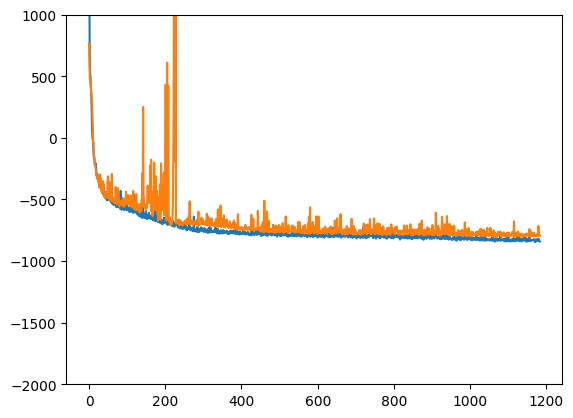

In [10]:
plt.plot(train_curve1)
plt.plot(valid_curve1)
plt.ylim([-2000, 1000])
plt.show()

# plt.plot(train_curve2)
# plt.plot(valid_curve2)
# plt.show()

# plt.plot(train_curve3)
# plt.plot(valid_curve3)
# plt.show()

In [11]:
# vi.load()
# vi.update_mulogvar_offlinedata()

In [12]:
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata1 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata2 = copy.deepcopy(vi.simenv_rolloutdata)
vi.get_sim_rollout_mdppolicy_data_fixlen()
simdata3 = copy.deepcopy(vi.simenv_rolloutdata)


0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  predict diverge [ 65.800659   -45.14182419] [ 11.59914249 -21.75693746] [99.57568  26.493084] [49.78784  13.246542] sim_timestep 127
87  88  89  90  91  92  93  94  95  96  97  98  99   
0  1  2  3  4  5  6  7  8  9  10  11  12  13  14  15  16  17  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  predict diverge [ 9.69186364 28.31594028] [ 1.15144059 11.02389743] [99.57568  26.493084] [49.78784  13.246542] sim_timestep 109
87  88  

実環境方策rollout vs Sim環境方策rollout


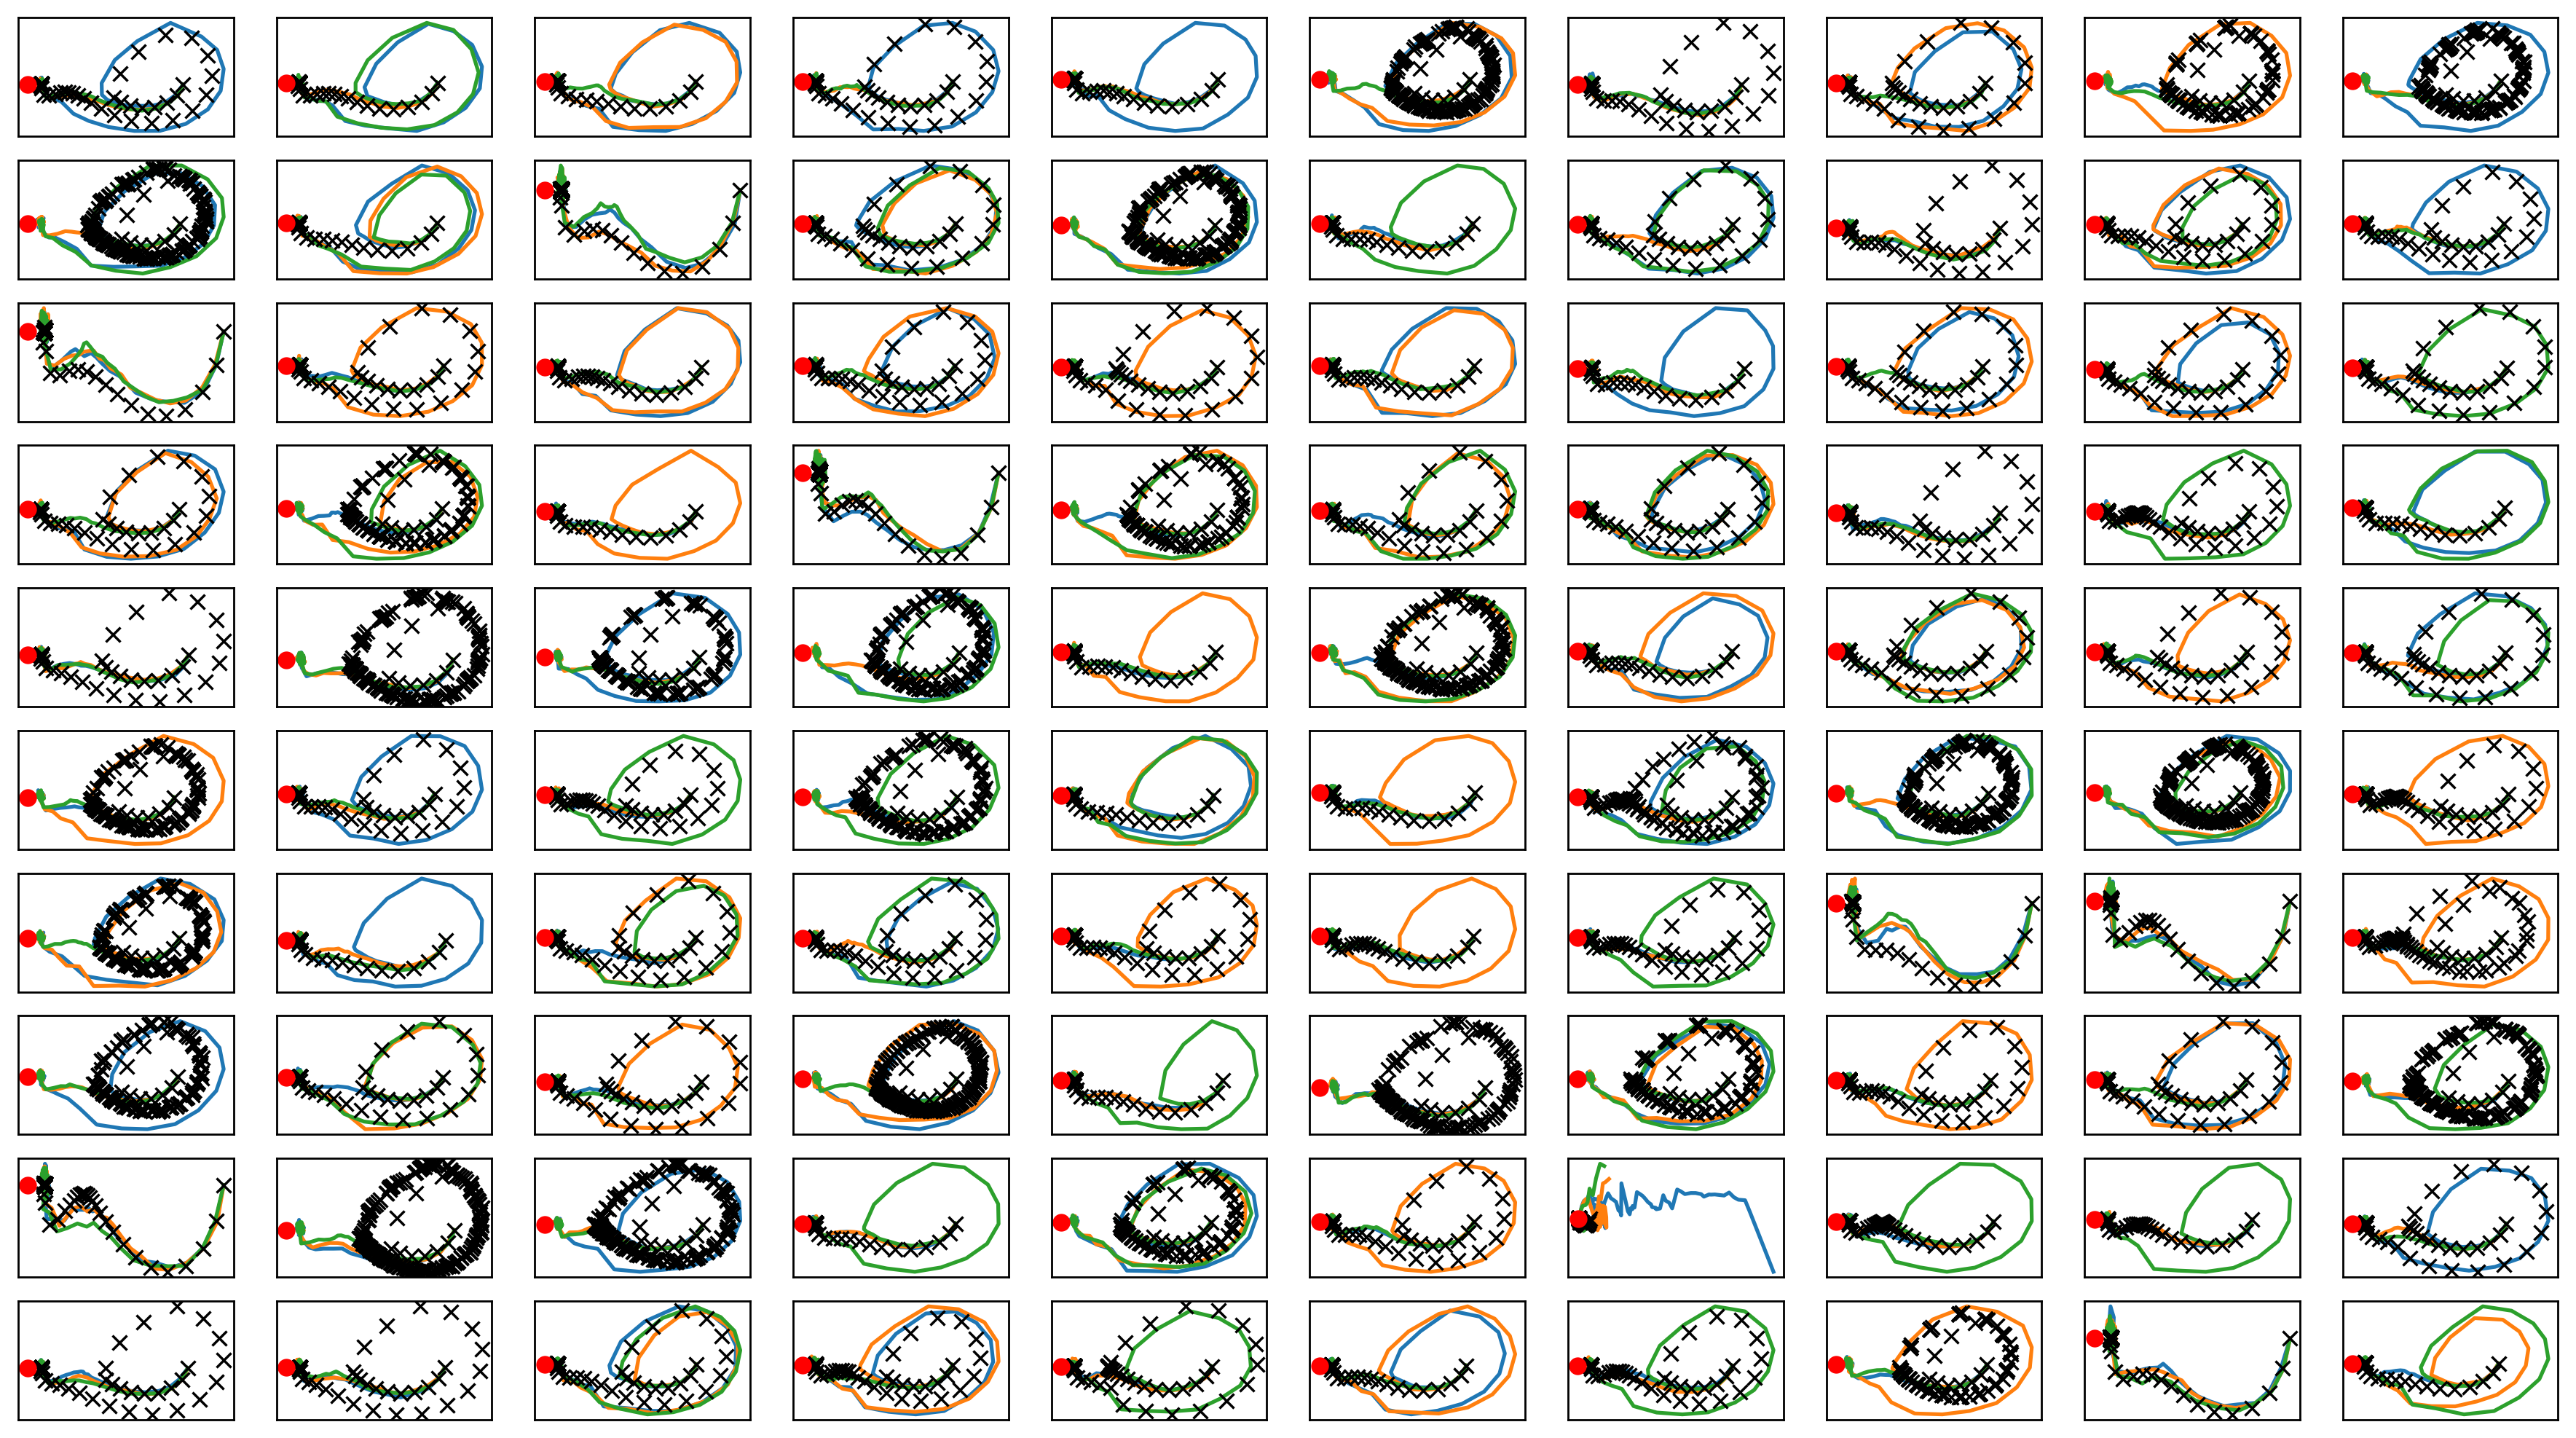

In [13]:


fig = plt.figure(figsize=(18,10*int(len(offline_data)//100)), dpi=250)
fig.patch.set_facecolor('white')
ax_list = []
for i in range(len(offline_data)):
    ax_list.append(fig.add_subplot(len(offline_data)//10, 10, i+1))
    ax_list[-1].set_xticks([])
    ax_list[-1].set_yticks([])
    ax_list[-1].plot(simdata1[i][:,0], simdata1[i][:,1]) 
    ax_list[-1].plot(simdata2[i][:,0], simdata2[i][:,1]) 
    ax_list[-1].plot(simdata3[i][:,0], simdata3[i][:,1]) 
    ax_list[-1].plot(vi.debug_realenv_rolloutdata[i][:,0], vi.debug_realenv_rolloutdata[i][:,1],"kx")
    ax_list[-1].plot(0, 0,"ro")     

plt.savefig(figfilenamehead+"two_stage.png")
plt.savefig(figfilenamehead+"two_stage.eps")
# plt.savefig(figfilenamehead+"two_stage.pdf")

print("実環境方策rollout vs Sim環境方策rollout")

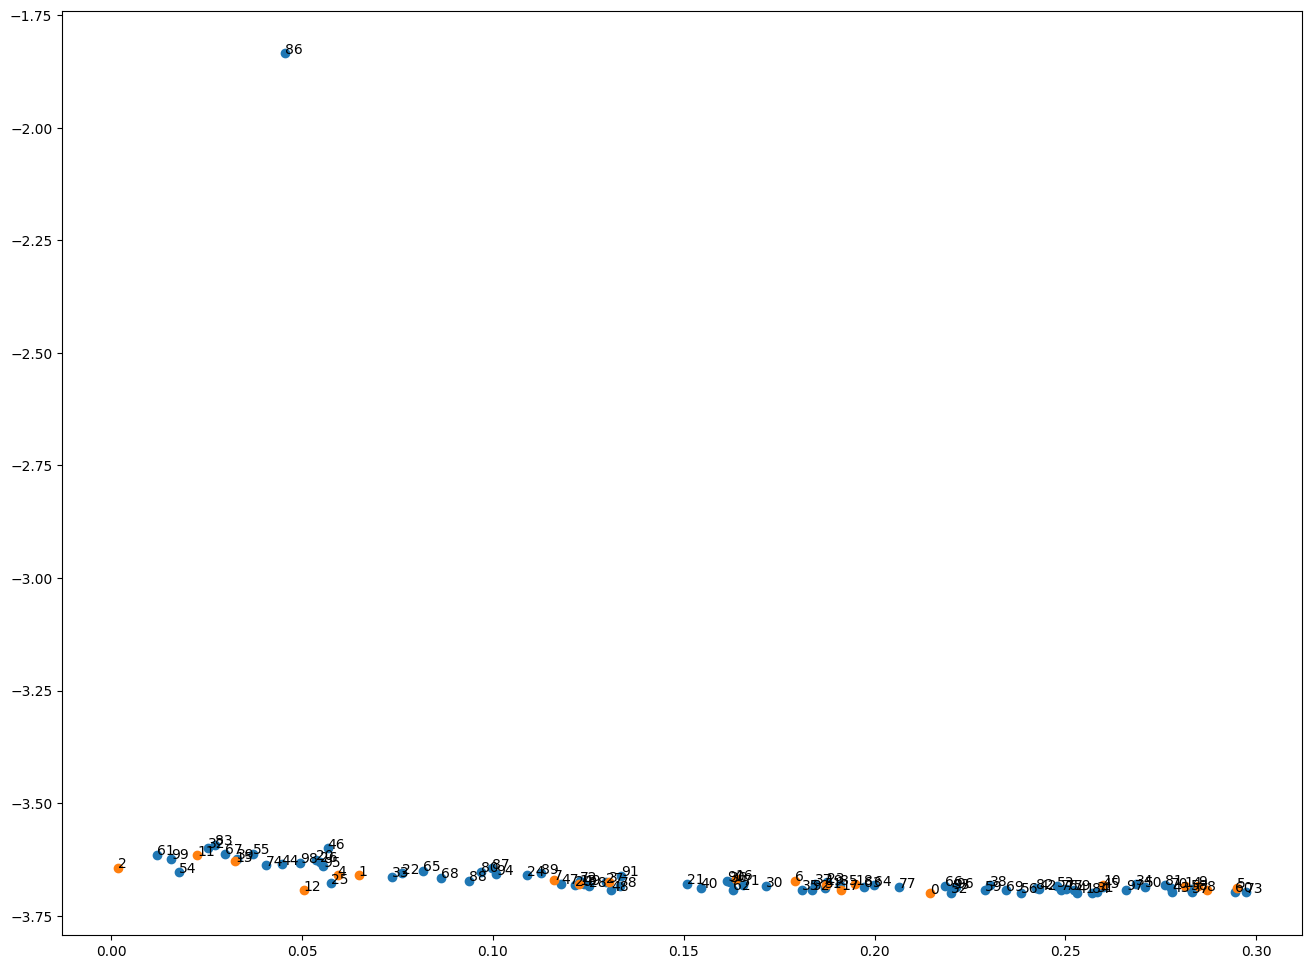

[0.2144448  0.06482685 0.00186908 0.13043746 0.05930552 0.2950202
 0.17920018 0.11597138 0.28699589 0.28469319 0.25988679 0.02248458
 0.05039166 0.12253316 0.28127148 0.03245801 0.1635608  0.19128307
 0.19494153 0.18717483 0.05369217 0.15075992 0.07610389 0.18747925
 0.10885608 0.05743392 0.05473362 0.12954662 0.12503289 0.12144757
 0.17164163 0.25830429 0.02539848 0.07363611 0.26839539 0.18106905
 0.16202242 0.18436885 0.23032741 0.03294544 0.15439611 0.2531121
 0.24304333 0.27801621 0.04461805 0.25973247 0.05670773 0.11783435
 0.13102989 0.12374166 0.27072656 0.18707065 0.21989962 0.24780686
 0.01766403 0.03720439 0.238327   0.28313925 0.28277575 0.22889809
 0.29436298 0.01202734 0.16298709 0.19724539 0.19996752 0.08174144
 0.21848083 0.02979833 0.08641105 0.23445934 0.27774258 0.16557793
 0.12287742 0.29723905 0.04042578 0.25013441 0.24882538 0.20646638
 0.1333622  0.25213982 0.09677249 0.2759962  0.24226469 0.02727317
 0.25685513 0.1910546  0.04556568 0.09974855 0.09366151 0.112602

In [14]:
plt.figure(figsize=(16,12))
np_mulogvar = vi.mulogvar_offlinedata.numpy()

plt.plot(debug_info[vi.validdata_num:,1], np_mulogvar[vi.validdata_num:,0], "o")
plt.plot(debug_info[:vi.validdata_num,1], np_mulogvar[:vi.validdata_num,0], "o")

for i in range(len(debug_info)):
    plt.annotate(str(i), xy=(debug_info[i,1],  np_mulogvar[i,0]))
plt.show()
print(debug_info[:,1])
# plt.show()
print("摩擦係数-潜在変数")

平均-対数分散


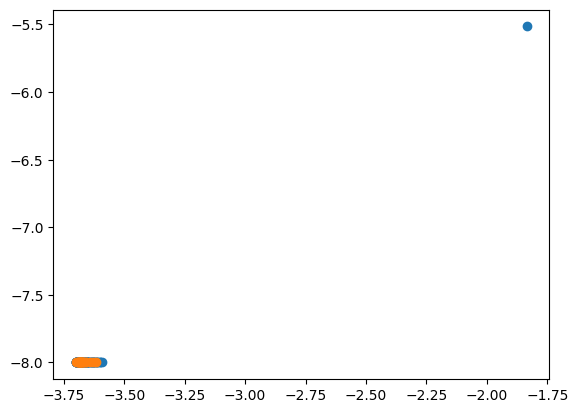

In [15]:

plt.plot(np_mulogvar[vi.validdata_num:,0],np_mulogvar[vi.validdata_num:,1], "o")
plt.plot(np_mulogvar[:vi.validdata_num,0],np_mulogvar[:vi.validdata_num,1],  "o")
print("平均-対数分散")

In [16]:
train_curve, valid_curve = vi.train_initial_belief(num_iter=100000, lr=1e-3, early_stop_step=default_early)


train: iter 0  trainloss 7.23286  validloss 7.66374±0.00000  bestvalidloss 7.66374  last_update 0
train: iter 1  trainloss 6.55612  validloss 6.92220±0.00000  bestvalidloss 6.92220  last_update 0
train: iter 2  trainloss 6.00722  validloss 6.32358±0.00000  bestvalidloss 6.32358  last_update 0
train: iter 3  trainloss 5.52668  validloss 5.80027±0.00000  bestvalidloss 5.80027  last_update 0
train: iter 4  trainloss 5.12344  validloss 5.34624±0.00000  bestvalidloss 5.34624  last_update 0
train: iter 5  trainloss 4.77183  validloss 4.97314±0.00000  bestvalidloss 4.97314  last_update 0
train: iter 6  trainloss 4.47311  validloss 4.65464±0.00000  bestvalidloss 4.65464  last_update 0
train: iter 7  trainloss 4.20351  validloss 4.37240±0.00000  bestvalidloss 4.37240  last_update 0
train: iter 8  trainloss 3.97569  validloss 4.10514±0.00000  bestvalidloss 4.10514  last_update 0
train: iter 9  trainloss 3.76400  validloss 3.90608±0.00000  bestvalidloss 3.90608  last_update 0
train: iter 10  trai

train: iter 85  trainloss 0.34299  validloss 0.28010±0.00000  bestvalidloss 0.28010  last_update 0
train: iter 86  trainloss 0.31476  validloss 0.25334±0.00000  bestvalidloss 0.25334  last_update 0
train: iter 87  trainloss 0.30259  validloss 0.22681±0.00000  bestvalidloss 0.22681  last_update 0
train: iter 88  trainloss 0.26907  validloss 0.20129±0.00000  bestvalidloss 0.20129  last_update 0
train: iter 89  trainloss 0.25863  validloss 0.17414±0.00000  bestvalidloss 0.17414  last_update 0
train: iter 90  trainloss 0.23593  validloss 0.15077±0.00000  bestvalidloss 0.15077  last_update 0
train: iter 91  trainloss 0.21022  validloss 0.12942±0.00000  bestvalidloss 0.12942  last_update 0
train: iter 92  trainloss 0.19955  validloss 0.10715±0.00000  bestvalidloss 0.10715  last_update 0
train: iter 93  trainloss 0.18642  validloss 0.08493±0.00000  bestvalidloss 0.08493  last_update 0
train: iter 94  trainloss 0.16207  validloss 0.06646±0.00000  bestvalidloss 0.06646  last_update 0
train: ite

train: iter 175  trainloss -0.13889  validloss -0.45501±0.00000  bestvalidloss -0.45501  last_update 0
train: iter 176  trainloss -0.09713  validloss -0.46081±0.00000  bestvalidloss -0.46081  last_update 0
train: iter 177  trainloss -0.17135  validloss -0.46055±0.00000  bestvalidloss -0.46081  last_update 1
train: iter 178  trainloss -0.10993  validloss -0.46457±0.00000  bestvalidloss -0.46457  last_update 0
train: iter 179  trainloss -0.13805  validloss -0.46018±0.00000  bestvalidloss -0.46457  last_update 1
train: iter 180  trainloss -0.09546  validloss -0.46746±0.00000  bestvalidloss -0.46746  last_update 0
train: iter 181  trainloss -0.05436  validloss -0.46883±0.00000  bestvalidloss -0.46883  last_update 0
train: iter 182  trainloss -0.14675  validloss -0.46751±0.00000  bestvalidloss -0.46883  last_update 1
train: iter 183  trainloss -0.09987  validloss -0.46877±0.00000  bestvalidloss -0.46883  last_update 2
train: iter 184  trainloss -0.18341  validloss -0.47493±0.00000  bestvali

train: iter 255  trainloss -0.17272  validloss -0.56587±0.00000  bestvalidloss -0.57240  last_update 1
train: iter 256  trainloss -0.17266  validloss -0.56896±0.00000  bestvalidloss -0.57240  last_update 2
train: iter 257  trainloss -0.15776  validloss -0.56599±0.00000  bestvalidloss -0.57240  last_update 3
train: iter 258  trainloss -0.17203  validloss -0.56896±0.00000  bestvalidloss -0.57240  last_update 4
train: iter 259  trainloss -0.17671  validloss -0.57435±0.00000  bestvalidloss -0.57435  last_update 0
train: iter 260  trainloss -0.11641  validloss -0.57113±0.00000  bestvalidloss -0.57435  last_update 1
train: iter 261  trainloss -0.11746  validloss -0.57408±0.00000  bestvalidloss -0.57435  last_update 2
train: iter 262  trainloss -0.13281  validloss -0.57493±0.00000  bestvalidloss -0.57493  last_update 0
train: iter 263  trainloss -0.11962  validloss -0.57580±0.00000  bestvalidloss -0.57580  last_update 0
train: iter 264  trainloss -0.19121  validloss -0.57361±0.00000  bestvali

train: iter 337  trainloss -0.20141  validloss -0.60752±0.00000  bestvalidloss -0.61603  last_update 6
train: iter 338  trainloss -0.11052  validloss -0.61242±0.00000  bestvalidloss -0.61603  last_update 7
train: iter 339  trainloss -0.14502  validloss -0.61060±0.00000  bestvalidloss -0.61603  last_update 8
train: iter 340  trainloss -0.16089  validloss -0.61888±0.00000  bestvalidloss -0.61888  last_update 0
train: iter 341  trainloss -0.11904  validloss -0.61515±0.00000  bestvalidloss -0.61888  last_update 1
train: iter 342  trainloss -0.21131  validloss -0.61670±0.00000  bestvalidloss -0.61888  last_update 2
train: iter 343  trainloss -0.17267  validloss -0.62105±0.00000  bestvalidloss -0.62105  last_update 0
train: iter 344  trainloss -0.20065  validloss -0.60829±0.00000  bestvalidloss -0.62105  last_update 1
train: iter 345  trainloss -0.12657  validloss -0.61261±0.00000  bestvalidloss -0.62105  last_update 2
train: iter 346  trainloss -0.14533  validloss -0.62293±0.00000  bestvali

train: iter 417  trainloss -0.11964  validloss -0.62835±0.00000  bestvalidloss -0.63121  last_update 1
train: iter 418  trainloss -0.12910  validloss -0.61795±0.00000  bestvalidloss -0.63121  last_update 2
train: iter 419  trainloss -0.16389  validloss -0.62762±0.00000  bestvalidloss -0.63121  last_update 3
train: iter 420  trainloss -0.12880  validloss -0.62653±0.00000  bestvalidloss -0.63121  last_update 4
train: iter 421  trainloss -0.19928  validloss -0.62598±0.00000  bestvalidloss -0.63121  last_update 5
train: iter 422  trainloss -0.20093  validloss -0.62696±0.00000  bestvalidloss -0.63121  last_update 6
train: iter 423  trainloss -0.14088  validloss -0.62557±0.00000  bestvalidloss -0.63121  last_update 7
train: iter 424  trainloss -0.19078  validloss -0.62865±0.00000  bestvalidloss -0.63121  last_update 8
train: iter 425  trainloss -0.17392  validloss -0.62493±0.00000  bestvalidloss -0.63121  last_update 9
train: iter 426  trainloss -0.16036  validloss -0.63027±0.00000  bestvali

train: iter 503  trainloss -0.08817  validloss -0.64156±0.00000  bestvalidloss -0.64261  last_update 21
train: iter 504  trainloss -0.17487  validloss -0.63012±0.00000  bestvalidloss -0.64261  last_update 22
train: iter 505  trainloss -0.19405  validloss -0.63133±0.00000  bestvalidloss -0.64261  last_update 23
train: iter 506  trainloss -0.09543  validloss -0.63515±0.00000  bestvalidloss -0.64261  last_update 24
train: iter 507  trainloss -0.15554  validloss -0.63816±0.00000  bestvalidloss -0.64261  last_update 25
train: iter 508  trainloss -0.13555  validloss -0.63836±0.00000  bestvalidloss -0.64261  last_update 26
train: iter 509  trainloss -0.16461  validloss -0.64213±0.00000  bestvalidloss -0.64261  last_update 27
train: iter 510  trainloss -0.08996  validloss -0.63566±0.00000  bestvalidloss -0.64261  last_update 28
train: iter 511  trainloss -0.20011  validloss -0.63744±0.00000  bestvalidloss -0.64261  last_update 29
train: iter 512  trainloss -0.12921  validloss -0.63777±0.00000 

train: iter 583  trainloss -0.15575  validloss -0.64426±0.00000  bestvalidloss -0.64964  last_update 29
train: iter 584  trainloss -0.19584  validloss -0.64051±0.00000  bestvalidloss -0.64964  last_update 30
train: iter 585  trainloss -0.14782  validloss -0.64831±0.00000  bestvalidloss -0.64964  last_update 31
train: iter 586  trainloss -0.20308  validloss -0.64702±0.00000  bestvalidloss -0.64964  last_update 32
train: iter 587  trainloss -0.16564  validloss -0.64131±0.00000  bestvalidloss -0.64964  last_update 33
train: iter 588  trainloss -0.13700  validloss -0.64433±0.00000  bestvalidloss -0.64964  last_update 34
train: iter 589  trainloss -0.16155  validloss -0.64208±0.00000  bestvalidloss -0.64964  last_update 35
train: iter 590  trainloss -0.12039  validloss -0.64335±0.00000  bestvalidloss -0.64964  last_update 36
train: iter 591  trainloss -0.13384  validloss -0.63883±0.00000  bestvalidloss -0.64964  last_update 37
train: iter 592  trainloss -0.18209  validloss -0.63967±0.00000 

train: iter 665  trainloss -0.11422  validloss -0.64642±0.00000  bestvalidloss -0.65815  last_update 30
train: iter 666  trainloss -0.16190  validloss -0.64624±0.00000  bestvalidloss -0.65815  last_update 31
train: iter 667  trainloss -0.17694  validloss -0.65241±0.00000  bestvalidloss -0.65815  last_update 32
train: iter 668  trainloss -0.11841  validloss -0.64418±0.00000  bestvalidloss -0.65815  last_update 33
train: iter 669  trainloss -0.18813  validloss -0.64862±0.00000  bestvalidloss -0.65815  last_update 34
train: iter 670  trainloss -0.14856  validloss -0.64545±0.00000  bestvalidloss -0.65815  last_update 35
train: iter 671  trainloss -0.17766  validloss -0.65635±0.00000  bestvalidloss -0.65815  last_update 36
train: iter 672  trainloss -0.18309  validloss -0.64613±0.00000  bestvalidloss -0.65815  last_update 37
train: iter 673  trainloss -0.13768  validloss -0.64975±0.00000  bestvalidloss -0.65815  last_update 38
train: iter 674  trainloss -0.15420  validloss -0.64964±0.00000 

In [17]:
print(vi.initial_belief)


Parameter containing:
tensor([-3.6544, -3.1694], requires_grad=True)


In [18]:
train_curve, valid_curve = vi.train_penalty(num_iter=num_iter_max, lr=default_lr, early_stop_step=default_early)

train: iter 0  trainloss 18.43251  validloss 20.86900±0.00000  bestvalidloss 20.86900  last_update 0
train: iter 1  trainloss 10.02326  validloss 13.55713±0.00000  bestvalidloss 13.55713  last_update 0
train: iter 2  trainloss 5.03069  validloss 6.71848±0.00000  bestvalidloss 6.71848  last_update 0
train: iter 3  trainloss 3.15747  validloss 4.20363±0.00000  bestvalidloss 4.20363  last_update 0
train: iter 4  trainloss 2.38457  validloss 3.42596±0.00000  bestvalidloss 3.42596  last_update 0
train: iter 5  trainloss 2.04904  validloss 3.23273±0.00000  bestvalidloss 3.23273  last_update 0
train: iter 6  trainloss 1.90191  validloss 3.16446±0.00000  bestvalidloss 3.16446  last_update 0
train: iter 7  trainloss 1.85714  validloss 3.14938±0.00000  bestvalidloss 3.14938  last_update 0
train: iter 8  trainloss 1.83737  validloss 3.11753±0.00000  bestvalidloss 3.11753  last_update 0
train: iter 9  trainloss 1.82741  validloss 3.12318±0.00000  bestvalidloss 3.11753  last_update 1
train: iter 10

train: iter 84  trainloss 1.55921  validloss 2.34496±0.00000  bestvalidloss 2.26150  last_update 39
train: iter 85  trainloss 1.58751  validloss 2.41349±0.00000  bestvalidloss 2.26150  last_update 40
train: iter 86  trainloss 1.56895  validloss 2.41571±0.00000  bestvalidloss 2.26150  last_update 41
train: iter 87  trainloss 1.55836  validloss 2.41797±0.00000  bestvalidloss 2.26150  last_update 42
train: iter 88  trainloss 1.56621  validloss 2.38844±0.00000  bestvalidloss 2.26150  last_update 43
train: iter 89  trainloss 1.57993  validloss 2.38258±0.00000  bestvalidloss 2.26150  last_update 44
train: iter 90  trainloss 1.55633  validloss 2.41140±0.00000  bestvalidloss 2.26150  last_update 45
train: iter 91  trainloss 1.57637  validloss 2.32291±0.00000  bestvalidloss 2.26150  last_update 46
train: iter 92  trainloss 1.56125  validloss 2.46278±0.00000  bestvalidloss 2.26150  last_update 47
train: iter 93  trainloss 1.57255  validloss 2.45875±0.00000  bestvalidloss 2.26150  last_update 48


train: iter 167  trainloss 1.55176  validloss 2.35968±0.00000  bestvalidloss 2.26014  last_update 54
train: iter 168  trainloss 1.56989  validloss 2.40486±0.00000  bestvalidloss 2.26014  last_update 55
train: iter 169  trainloss 1.56292  validloss 2.40158±0.00000  bestvalidloss 2.26014  last_update 56
train: iter 170  trainloss 1.57912  validloss 2.48537±0.00000  bestvalidloss 2.26014  last_update 57
train: iter 171  trainloss 1.56204  validloss 2.44640±0.00000  bestvalidloss 2.26014  last_update 58
train: iter 172  trainloss 1.57213  validloss 2.44583±0.00000  bestvalidloss 2.26014  last_update 59
train: iter 173  trainloss 1.56368  validloss 2.37096±0.00000  bestvalidloss 2.26014  last_update 60
train: iter 174  trainloss 1.56565  validloss 2.42182±0.00000  bestvalidloss 2.26014  last_update 61
train: iter 175  trainloss 1.56091  validloss 2.39085±0.00000  bestvalidloss 2.26014  last_update 62
train: iter 176  trainloss 1.56429  validloss 2.42947±0.00000  bestvalidloss 2.26014  last_

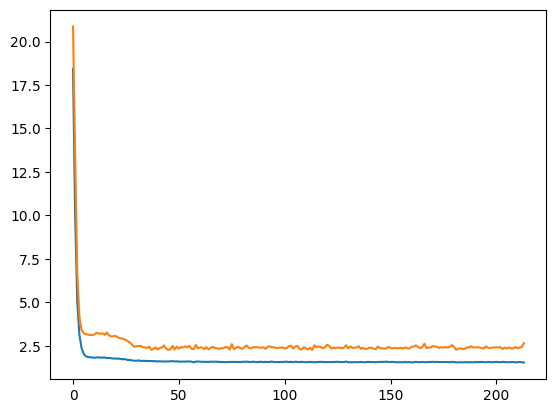

In [19]:
plt.plot(train_curve)
plt.plot(valid_curve)

In [20]:
vi.save(ckpt_key="unweighted")

base save ckpt ckpt_basevi_pendulum_unweighted
base load self.initial_belief.data.sum() tensor(-6.8239)
base load dec.state_dict()['net_phat.0.weight'].sum() tensor(-0.1776)


In [21]:
print(vi.h_min_tilde)

-6.139806


In [22]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

0.020573866576845557
tensor([0.6717])


In [23]:
import torch
from utils import log_gaussian, torch_from_numpy, kld

def tmp_nll(sads_array, z):
    sads_array = torch_from_numpy(sads_array)
    z = torch_from_numpy(np.array(z).reshape(-1))
#     z += torch.randn_like(z) * torch.exp(0.5*vi.initial_belief[vi.z_dim:])
    z += torch.randn_like(z) * np.exp(0.5*(-8))
    saz = torch.cat([sads_array[:, :(vi.sa_dim)], z* torch.ones(len(sads_array), vi.z_dim)], dim=1)
    ds_mulogvar = vi.dec(saz)
    ds = sads_array[:, (vi.sa_dim):(vi.sas_dim)]
    loss = - log_gaussian(ds, # y
               ds_mulogvar[:, :vi.s_dim], # mu
               ds_mulogvar[:, vi.s_dim:] # logvar
               ).sum()
#     print(z)
    loss +=  kld(z,
                 vi.initial_belief[vi.z_dim:],
                 vi.initial_belief.detach()[:vi.z_dim],
                 vi.initial_belief.detach()[vi.z_dim:])
#                  vi.prior[:vi.z_dim],
#                  vi.prior[vi.z_dim:])
    
    return loss.detach().numpy()

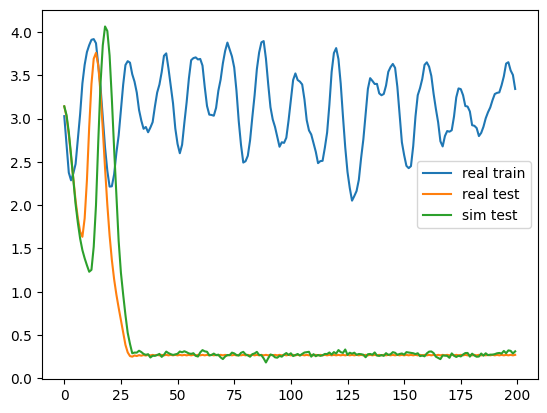

encoder [-3.6813583 -8.       ]
initial_belief tensor([-3.6544, -3.1694])
real train tensor([-3.7071, -8.0010])
real test tensor([-3.6508, -3.1729])
sim tensor([-3.6564, -3.1714])


In [24]:
# i = 24
i = 19


tmp_data = 1 * vi.offline_data[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief1 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real train")

tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief2 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="real test")

tmp_data = 1 * simdata1[i]
ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])
belief3 = vi.get_belief(sads_array)
plt.plot(tmp_data[:,0], label="sim test")
plt.legend()
plt.show()


print("encoder", vi.mulogvar_offlinedata[i].numpy())
print("initial_belief", vi.initial_belief.data)
print("real train",belief1)
print("real test",belief2)
print("sim", belief3)

-3.6938775510204085


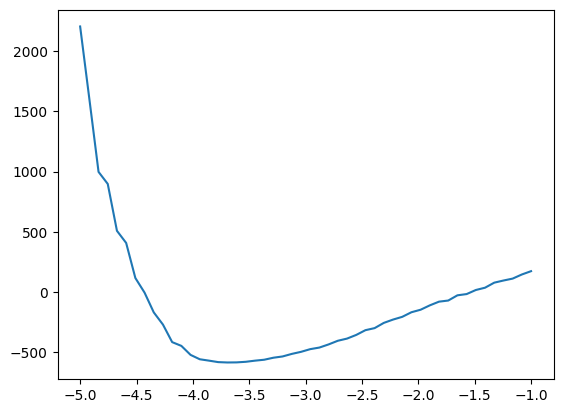

In [25]:
# tmp_data = 1 * vi.offline_data[i]
# tmp_data = 1 * vi.debug_realenv_rolloutdata[i]
tmp_data = 1 * simdata1[i]

np_mulogvar = vi.mulogvar_offlinedata.numpy()

ds = tmp_data[1:,:vi.s_dim] - tmp_data[:-1,:vi.s_dim]
sads_array = np.hstack([tmp_data[:-1,:vi.sa_dim], ds])

z_array = np.linspace(np_mulogvar[:,0].min()-1,np_mulogvar[:,0].max()+1)
z_array = np.linspace(-5,-1)

nll_list = []
for i in range(len(z_array)):
    nll_list.append(tmp_nll(sads_array, z_array[i]))
nll_list = np.array(nll_list)
plt.plot(z_array, nll_list)

print(z_array[np.argmin(nll_list)])

In [26]:
# for reproducibility check
print(np.random.randn())
print(torch.randn(1))

2.0536286363376144
tensor([1.7638])
